# POE user analyzing project
###### **Data reference and questions are here: https://www.kaggle.com/datasets/gagazet/path-of-exile-league-statistic**

---
Hi, I'm Angela. 😊 I'm a novice in data analysis.  I'm a novice in data analysis. I'm interested in the video games, mobility, culture, and content industry. I hope to become a data scientist with anomaly detection and anti-cheating. I hope that my analysis will have a positive impact on the world at least a little bit.  

This is my first Kaggle-data analyzing project on my own. I played(?) with this data for almost a month or more freely, and I finish it to start to answer these questions partially. Finally, I can close the analysis joyfully.
I analyzed this data set with my thoughts and what I learned (as if I were a game analyst 😆).  
_ps. English may seem a little awkward because it is not my first language. I'm sorry. And I used the word 'average' more than the word 'mean' because I wanted to communicate more clearly in my hectic writing. 'mean' is so mean to 'average', 'mean' means 'mean' and... just joking._ 🤪

---
##### **Questions for participants**

1. A total number of players in each division, usage of each class in descending order.
2. Some of the players streaming their game (twitch column). Do they play better than people, who does not?
3. Predict chance to be at top 30 in each division, if we are Necromancer. With and without stream.
4. Average number of finished challanges for each division, show division with highest and lowest average challanges.
5. Show dependency between level and class of died characters. Only for HC divisions.


## Importin Data and Libraries
---

In [1]:
import pandas as pd
import numpy as np

import time as time
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras

np.random.seed(0)
tf.random.set_seed(0)

# version check
print(sns.__version__)
print(pd.__version__)
print(np.__version__)
print(tf.__version__)
print(keras.__version__)

data = pd.read_csv("poe_stats.csv")

0.11.2
1.4.1
1.22.4
2.9.1
2.9.0


In [2]:
df = data
df.head(10)

,rank,dead,online,name,level,class,id,experience,account,challenges,twitch,ladder
0,1,False,False,Tzn_NecroIsFineNow,100,Necromancer,3dcddd59f5088893f734f39686350990dae168cc4f4b00...,4250334444,TheTzn,40,thetzn,Harbinger
1,1,False,False,RaizNeverFirstQT,100,Necromancer,8f3216db5ac9106c287a834731aafc83c387138f28fc45...,4250334444,RaizQT,22,raizqt,SSF Harbinger HC
2,1,False,False,GucciStreamerAdvantage,100,Necromancer,c6ec2dae3855c551e0597c06ef2da06fbb5512487ded7f...,4250334444,GucciPradas,35,guccipradas,Hardcore Harbinger
3,1,False,False,ChiroxPrime,100,Slayer,c861372da792be0b22c45bf437ccd58437c52e9455e0bf...,4250334444,Chiroxun,26,NaN,SSF Harbinger
4,2,False,False,Cool_NecroIsFineNow,100,Deadeye,24ae924ceed7989ef3d3d6772612832bb467a6094352c7...,4250334444,cooltail,22,NaN,Harbinger
5,2,False,False,SteelStreamerAdvantage,100,Deadeye,51acb8e6fac3cfaa7ff848151dad01b0a6f350e7525543...,4250334444,Steelmage,37,steelmage202,Hardcore Harbinger
6,2,False,False,Grom_WhyGodThreeCmWhy,100,Gladiator,5d8b80b2bdd30f3dba1036a6791187562758935e8d4723...,4250334444,rocklegend,22,gromick,SSF Harbinger HC
7,2,False,False,beobio_capitan,100,Inquisitor,65c58f9b186e1fbe9f927484f3f178cdb9ee0dc2427289...,4250334444,TishaVosemsot,40,beobio,SSF Harbinger
8,3,False,False,Rami_The_Negromaniac,100,Necromancer,00c0030fc548cc4c0d804564f8fb356610044b7e6d484f...,4250334444,rami1337,40,rami1337,Harbinger
9,3,False,False,FutonBlewAway,100,Raider,46e56572ff6e403f45fac597240e13e9af225f06ca4e52...,4250334444,pleaGRC,40,NaN,SSF Harbinger


## Data summary

In [3]:
# options about float

pd.options.display.float_format = '{:,.2f}'.format
df.describe()

,rank,level,experience,challenges
count,"59,776.00","59,776.00","59,776.00","59,776.00"
mean,"7,495.37",85.42,"1,825,786,027.36",25.76
std,"4,330.18",11.29,"1,094,747,934.61",8.44
min,1.00,53.00,"77,909,816.00",4.00
25%,"3,745.00",78.00,"777,469,746.25",19.00
50%,"7,492.00",90.00,"1,934,009,687.00",25.00
75%,"11,247.00",95.00,"2,876,116,901.00",33.00
max,"15,000.00",100.00,"4,250,334,444.00",40.00


In [4]:
df.describe(include = 'object')

,name,class,id,account,twitch,ladder
count,59776,59776,59776,59776,16300,59776
unique,58286,26,59776,37123,9613,4
top,_Flic_,Berserker,3dcddd59f5088893f734f39686350990dae168cc4f4b00...,chuz101,thespunkylobster,SSF Harbinger
freq,14,8711,1,30,18,14981


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59776 entries, 0 to 59775
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rank        59776 non-null  int64 
 1   dead        59776 non-null  bool  
 2   online      59776 non-null  bool  
 3   name        59776 non-null  object
 4   level       59776 non-null  int64 
 5   class       59776 non-null  object
 6   id          59776 non-null  object
 7   experience  59776 non-null  int64 
 8   account     59776 non-null  object
 9   challenges  59776 non-null  int64 
 10  twitch      16300 non-null  object
 11  ladder      59776 non-null  object
dtypes: bool(2), int64(4), object(6)
memory usage: 4.7+ MB


# 3. A case when we were Necromancer
---
##### Q3. Predict the chance to be in the top 30 in each division, if we are Necromancer. With and without stream.

I don't know exactly what 'stream' means, but I think it would be twitch streaming. So, I define it as all Necromancer characters and Necromancer characters with twitch streaming.  
In this case, I could think of the question like these...:  

    1. simply get a percentage of Necromancer in the top 30 by ladder (And multiply the probability of getting in the top 30 ranks)  
    2. get a percentage of Necromancer IDs in the top 30 among all Necromancers (And divide it by the sum of the percentage of each class)  
    3. Simply get a ratio of the Necromancer who is in rank 30 among all IDs(by ladder)  
    4. make a model with 'rank', 'class', 'ladder', 'twitch' columns, and predict.  
I listed these as 3-1-1, 3-1-2, and 3-1-3 except no.4, and it is the same in the following analysis(care about 'stream'), 3-2-1, 3-2-2, 3-2-3.  

##### Before the analysis(and getting numbers), I should clarify this thing, the meaning of each analysis. This is very important I think.

I thought about these methods partially. Things like what we can do with data, how, and the meaning of it, and the flaws.  
I used the word 'hypothesis', I used the word 'hypothesis' sometimes, which is related to when we use specific methods(values) for solving the problem correctly.  
And the critical problem(supposition) is here, we are extremely good at playing POE (especially Necromancer class🤣).

> ##### 3-1-1: ”(number of Necromancers in the top 30 $\div$ number of All classes in the top 30) $\times$ (probability when we are in the top 30 among 15000 ranks)”  
In `3-1-1`, I got the ratio between classes in the top 30.  
This is simply the top 30 class percentage. We can answer what classes are in the top 30. It's very extreme.  
When we use this one, we need a hypothesis; we're so good that we can compete with the top 30 characters, and none of them(all characters) which are not in the top 30 are a match for us. It's like a set of competitions between classes in the top 30.  
And then, I thought about whether I should multiply the probability of being in the top 30. If you're good enough and you're in the top 15,000, assuming that the ranking is somewhat determined by luck, you might be able to solve it with 30/15000.  
It's like, we have enough skills to make it to the top 30, so we assume that out of 15,000 characters, the top 30 ranks is decided by luck. (Of course, I think some people think that this number can be multiplied or not multiplied enough to show the probability.)  
There is, of course, a problem with this method: numbers outside the top 30 are ignored no matter how many necromancers are out there or other hot classes (Pathfinder, Gladiator, Slayer).  
But we have to answer this question! Let's find out.


> ##### 3-1-2: “(number of Necromancers in the top 30 $\div$ number of All Necromancers)”  
In `3-1-2`, I think the top 30 means the pilots' league who is really good at playing.  
So in 3-1-2-2, I got a percentage of the top 30 Necromancers among 'all Necromancers'.  
This is divided top 30 Necromancers' numbers by all Necromancers' numbers. It means, we can answer how many characters are playing best among all Necromancers.  
And applying it to the other classes, when the number of characters in each job is the same, you can see how many top rankers there are in each job.  So in other classes, I got the ratio (3-1-2-3) in the same way. Because of the reason that each class has a different number of characters so we can't simply compare like 3-1. In this case, rather than being in the top 30, the 'class selection' case should be considered and compared.  
The problem is, that this case needs a supposition too; I'm sure everyone felt that in this question, it's assuming a situation where all players do the same.  
And it is seriously affected by character numbers who are out of the rank of 30.  Thus this method isn't perfect also, for solving the question. (Yet I think this is the most reasonable way personally.)  


> ##### 3-1-3: ”(number of Necromancers in the top 30 $\div$ number of All classes in the top 30)”
In 3-1-3, I got the percentage of the top 30 Necromancers among 'all characters'.  
This is divided top 30 Necromancers numbers by numbers of all characters, in each ladder.  
So we can answer what percentage of the total is Necromancer in the top 30. It’s simple but it seems working.    
But this method allows us to know the best Necromancer percentages except for comparison problems. We're also Necromancer, but Necromancer outside the top 30 is ignored.  
(In many ways I think it's not appropriate to solve a problem on the assumption that 'if' we are a necromancer.)   


> ##### 3-1-4: Bayesian Probability  
In 3-1-4, I will try to apply the concept of Bayesian probability. First, we need to recognize that there is a slight difference in nuance. The assumption that we are a Necromancer is not our choice but rather a dimension of interpreting indicators of results that can be obtained from data. It's different from 3-1-2 in that we don't treat it as something that's already happened. This considers numerical differences from other classes.  
And here too, the assumption is necessary. (Because our abilities are at an enormous level), getting into the top 30 is merely a matter of luck (30/15000), and being out of the ranking is also a matter of luck. The formulas to calculate $P(Top30)$ and $P(out of 30)$ are $30/150000$ and $14970/15000$ (of course $\times 4$ is omitted), respectively. (It was sad yet interesting to attempt such calculations despite the fact that the probability of being in the Top 30 as Necromancer depends on our ability.)  
    $$
    P(H|E) = \frac {P(E|H)P(H)} {P(E)}
    $$
Using this, $H$ represents the hypothesis that Top30 occurred, and $E$ represents the information that we are Necromancer. $P(H)$ is the prior probability, which is the confidence in the probability of being in the top 30, and $P(H|E)$ is the posterior probability, which is the confidence in the probability of being in the top 30 when we are Necromancer. (Although Bayesian probability, unlike empirical probability, refers to 'confidence in a claim, I can refer to it like a traditional probability, so please keep that in mind...)   
    - The formula is as follows:  
    $$
    P(Top30|Nec) = \frac {P(Nec | Top30)\times P(Top30)} {P(Nec)}
    $$  
    - To recapitulate this using this, $P(A|B) = \frac {P(A\bigcap B)} {P(B)}$,  
    $$
    P(Top30|Nec) = \frac {P(Nec | Top30)\times P(Top30)} {P(Nec|Top30)\times P(Top30) + 
    P(Nec|out\space of\space 30)\times P(out\space of\space 30) }
    $$  
    - Then we got a probability of some other classes, and we saw if the odds were high or not.  


##### Before the steps
- check the 'rank' column whether it includes null or not in 30.  
- make a 'stream' dummy column for analysis depending on whether or not.  
- set some conditions for code writing comfort.  

In [6]:
# check the rank number in each ladder whether there is a null or not. 
df[df['rank']<=30].groupby('ladder')['rank'].nunique()

ladder
Harbinger             30
Hardcore Harbinger    30
SSF Harbinger         30
SSF Harbinger HC      30
Name: rank, dtype: int64

In [7]:
# make a twitch column dummy with streaming.
df['stream'] = np.where(df['twitch'].isna(), 0, 1)

In [8]:
# condition list
cond_Nec = (df['class']=='Necromancer')
cond_tw = (df['stream']==1)
cond_30 = (df['rank']<=30)

## 3-1. not care of stream 
---


### 3-1-1. The Necromancer ratio of Among the top 30 * probability when we are in the top 30

__”(number of Necromancers in the top 30 $\div$ number of All classes in the top 30) $\times$ (probability when we are in the top 30 among 15000 ranks)”__  

Let's see what classes in top 30 and thier rate.

And get the percentage between classes in the top 30 characters

In [9]:
# in top 30 classes number 
df[cond_30].pivot_table(columns = 'ladder', index = 'class',
                                aggfunc = 'count', fill_value = 0)['id']

ladder,Harbinger,Hardcore Harbinger,SSF Harbinger,SSF Harbinger HC
class,,,,
Ascendant,0,2,2,0
Berserker,2,1,3,0
Champion,1,2,0,2
Chieftain,0,1,1,1
Deadeye,1,2,0,0
Elementalist,1,0,1,0
Gladiator,1,4,3,3
Guardian,2,1,0,0
Hierophant,0,0,1,0


In [10]:
# in top 30 classes ratio 
df[cond_30].pivot_table(columns = 'ladder', index = 'class',
                                aggfunc = 'count', fill_value = 0)['id'] / 30*100

ladder,Harbinger,Hardcore Harbinger,SSF Harbinger,SSF Harbinger HC
class,,,,
Ascendant,0.00,6.67,6.67,0.00
Berserker,6.67,3.33,10.00,0.00
Champion,3.33,6.67,0.00,6.67
Chieftain,0.00,3.33,3.33,3.33
Deadeye,3.33,6.67,0.00,0.00
Elementalist,3.33,0.00,3.33,0.00
Gladiator,3.33,13.33,10.00,10.00
Guardian,6.67,3.33,0.00,0.00
Hierophant,0.00,0.00,3.33,0.00


#### [graph 3-1] visualization to pie chart

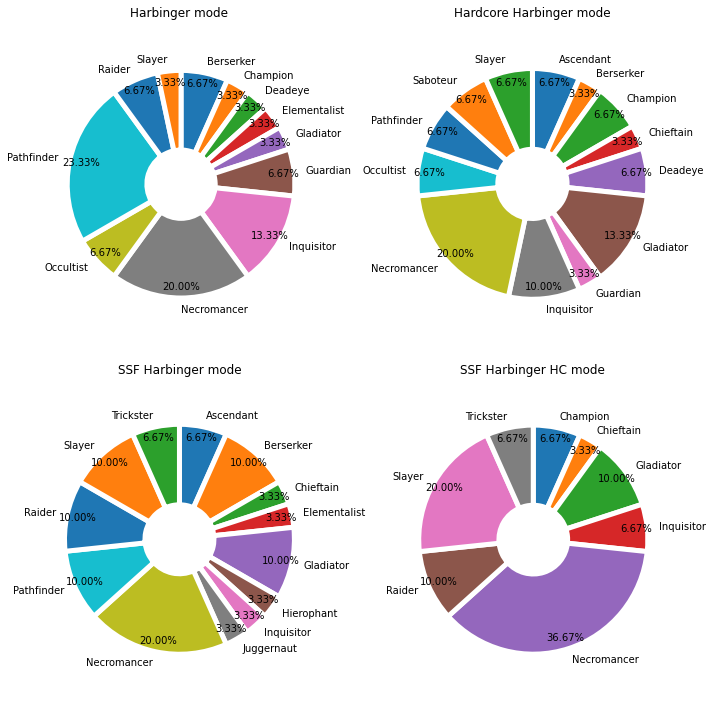

In [11]:
# make for repeatation for visualization
df_30pi = df[cond_30].pivot_table(columns = 'ladder', index = 'class',
                                aggfunc = 'count', fill_value = 0)['id'] / 30*100
df_30pi.reset_index(inplace = True)

# percentage list making : each ladde
Har_top30 = df_30pi[df_30pi['Harbinger']!=0][['class', 'Harbinger']]
HarHC_top30 = df_30pi[df_30pi['Hardcore Harbinger']!=0][['class', 'Hardcore Harbinger']]
SSFHar_top30 = df_30pi[df_30pi['SSF Harbinger']!=0][['class', 'SSF Harbinger']]
SSFHarHC_top30 = df_30pi[df_30pi['SSF Harbinger HC']!=0][['class', 'SSF Harbinger HC']]

# use ratio and labels to plt code
labels = df_30pi.index
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
fig, ax = plt.subplots(2, 2, squeeze=True, figsize = (10, 10))
plt.subplot(2,2,1)
plt.pie(Har_top30['Harbinger'], labels=Har_top30['class'], autopct='%.2f%%', startangle=90, counterclock=False, wedgeprops=wedgeprops, pctdistance=0.9)
plt.subplot(2,2,2)
plt.pie(HarHC_top30['Hardcore Harbinger'], labels=HarHC_top30['class'], autopct='%.2f%%', startangle=90, counterclock=False, wedgeprops=wedgeprops, pctdistance=0.9)
plt.subplot(2,2,3)
plt.pie(SSFHar_top30['SSF Harbinger'], labels=SSFHar_top30['class'], autopct='%.2f%%', startangle=90, counterclock=False, wedgeprops=wedgeprops, pctdistance=0.9)
plt.subplot(2,2,4)
plt.pie(SSFHarHC_top30['SSF Harbinger HC'], labels=SSFHarHC_top30['class'], autopct='%.2f%%', startangle=90, counterclock=False, wedgeprops=wedgeprops, pctdistance=0.9)

# set the each pie chart title
ax[0, 0].set_title("{} mode".format(Har_top30.columns[1]))
ax[0, 0].axis('equal')
ax[0, 1].set_title("{} mode".format(HarHC_top30.columns[1]))
ax[0, 1].axis('equal')
ax[1, 0].set_title("{} mode".format(SSFHar_top30.columns[1]))
ax[1, 0].axis('equal')
ax[1, 1].set_title("{} mode".format(SSFHarHC_top30.columns[1]))
ax[1, 1].axis('equal')
fig.tight_layout()
plt.show()

This poor chart took a quite long time. I wanted to delete the 0% (don't need information) classes but...

Necromancers take 20% in the top 30 except SSF Harbinger HC mode.  
In SSF Harbinger HC mode, Necromancers take 36.67% in the top 30. 


#### getting the probability by method 1 

Get the probablity by multiplying the probability to be in the top 30 and the ratio of Necromancers who are in the top 30.  
As you know, each ladder doesn't have an exact number of 15000 IDs. 

래더별 두가지 아래는 30위 안에일떄 네크로맨서 비율, 위에는 30위 안에 들을 확률

In [60]:
# the probability when we go in the top 30 by using broadcasting
total30prob = df[cond_30].groupby(by = 'ladder')['id'].count() / df.groupby(by = 'ladder')['id'].count()

# the ratio of Necromancers who are in the top 30.
Nec30ratio = df[(cond_30)&(cond_Nec)].groupby(by = 'ladder')['id'].count()/30

pd.set_option('display.float_format', None)
print(total30prob, '\n')
print(Nec30ratio)

ladder
Harbinger             0.002011
Hardcore Harbinger    0.002013
SSF Harbinger         0.002003
SSF Harbinger HC      0.002004
Name: id, dtype: float64 

ladder
Harbinger             0.200000
Hardcore Harbinger    0.200000
SSF Harbinger         0.200000
SSF Harbinger HC      0.366667
Name: id, dtype: float64


In [63]:
# multiplying
print(total30prob*Nec30ratio)

ladder
Harbinger             0.000402
Hardcore Harbinger    0.000403
SSF Harbinger         0.000401
SSF Harbinger HC      0.000735
Name: id, dtype: float64


#### method 1 result: 
AS we expected, there're quite little numbers.

    Harbinger             0.000402
    Hardcore Harbinger    0.000403
    SSF Harbinger         0.000401
    SSF Harbinger HC      0.000735

### 3-1-2. Rate Among the Necromancers

__“(number of Necromancers in the top 30 $\div$ number of All Necromancers)”__

#### (1) define datasets with the Necromancers 
Set the necromancer dataset for easy use.


In [124]:
# condition list
# cond_Nec = (df['class']=='Necromancer')
# cond_tw = (df['stream']==1)
# cond_30 = (df['rank']<=30)

# Let's define it separately.
df_Nec = df[cond_Nec]
df_Nec30 = df_Nec[df_Nec['rank']<=30]

#### [graph 3-2] Necromancers rank boxplot by each ladder
Draw a boxplot of the rank of each ladder's Necromancer. It is true that the plot is not appropriate because it is ranked data, but I draw it because it is easy to see which data points have extreme ranks or how much is median.  

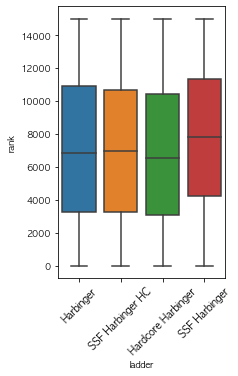

In [125]:
# Necromancers rank boxplot by ladder 
plt.figure(figsize=(3,5))
plt.xticks(rotation=45, fontsize=10)
sns.boxplot(data = df_Nec, x = 'ladder', y = 'rank')
plt.show()

#### (2) Top 30 Necromacers and the all Necromancers

Number of Necromancers and top 30 Necromancers by each ladder.

In [75]:
# 이건 전체를 합한 것에서 전체를 구한 것이고,
# 3-1-2-2 의 합이라고 생각하면 되겠다.
# 잠깐 확인차 해본 것이다.
# 근데왜 다르냐 차이가 꽤 큰데

daklsf = sum(df_Nec30.groupby('ladder')['id'].count())
daklsfsum = sum(df_Nec.groupby('ladder')['id'].count())
print(daklsf/daklsfsum*100)
sum(df_Nec30.groupby('ladder')['id'].count()/ df_Nec.groupby('ladder')['id'].count() * 100) / 4

0.4097781545852762


0.4169702021270031

In [130]:
daklsfsum

7077

In [126]:
# All Necromancers number by ladder
print(df_Nec.groupby('ladder')['id'].count(),"\n")

# Necromancers number Who are in top 30 by ladder
print(df_Nec30.groupby('ladder')['id'].count())

ladder
Harbinger             1207
Hardcore Harbinger    2099
SSF Harbinger         1716
SSF Harbinger HC      2055
Name: id, dtype: int64 

ladder
Harbinger              6
Hardcore Harbinger     6
SSF Harbinger          6
SSF Harbinger HC      11
Name: id, dtype: int64


And check the number of `df_Nec30`. 

In [17]:
# Necromancers Who are in top 30 by ladder, unique users
df_Nec30.groupby(by = 'ladder').nunique()

,rank,dead,online,name,level,class,id,experience,account,challenges,twitch,stream
ladder,,,,,,,,,,,,
Harbinger,6,1,1,6,1,1,6,1,6,4,6,1
Hardcore Harbinger,6,1,1,6,1,1,6,1,6,6,5,2
SSF Harbinger,6,1,1,6,3,1,6,4,6,5,2,2
SSF Harbinger HC,11,2,2,11,3,1,11,6,11,9,7,2


#### (3) getting the probability by method 2: percentage of the top 30 Necromancer among 'the all Necromancers'

Let's get the percentage of the top 30 Necromancers mong the all Necromancers.

In [127]:
# Necromancers Who are in top 30 among all Necromancers by ladder
df_Nec30.groupby('ladder')['id'].count() / df_Nec.groupby('ladder')['id'].count()

ladder
Harbinger             0.004971
Hardcore Harbinger    0.002859
SSF Harbinger         0.003497
SSF Harbinger HC      0.005353
Name: id, dtype: float64

#### (4) percentage of each class's top 30 characters among each class
이것 까지만 넣고 아래 네크/전체확률합 하는 것을 뺄까 하고있음

" classes who are in top 30 among all class-itself by ladder "  
What if you select a particular class, what is the probability that the particular class will be in the top 30?  
I want to get the number of 'the class' in the top 30 and the number of all 'the classes'. (like 3-2-1.)  

We can use this data to compare it with other classes.  

In [128]:
# classes who are in top 30 among each classes by ladder
# we exceptd the classes what is not in top30

classes = list(df[df['rank'] <= 30]['class'].unique())

print('this is percentage')

for i in classes:
    df_bin = df[df['class'] == i]
    df_bin30 = df_bin[df_bin['rank']<=30]
    ser = df_bin30.groupby('ladder')['id'].count() / df_bin.groupby('ladder')['id'].count() * 100
    sum_ser = ser.sum()
    print("# {} : top 30 ratio(%) in each class by ladder".format(i))
    print(ser)
    print("{}'s top 30 ratio(%): {}".format(i, sum_ser))
    print("==========================================")
    if i == classes[0]:
        ser1 = ser
    elif i == classes[1]:
        ser2 = ser
        concatingdf = pd.concat([ser1, ser2], axis=1, ignore_index=True)
    else:
        ser2 = ser
        concatingdf = pd.concat([concatingdf, ser2], axis=1, ignore_index=True)

this is percentage
# Necromancer : top 30 ratio(%) in each class by ladder
ladder
Harbinger             0.49710
Hardcore Harbinger    0.28585
SSF Harbinger         0.34965
SSF Harbinger HC      0.53528
Name: id, dtype: float64
Necromancer's top 30 ratio(%): 1.6678808085080123
# Slayer : top 30 ratio(%) in each class by ladder
ladder
Harbinger             0.058617
Hardcore Harbinger    0.148920
SSF Harbinger         0.230592
SSF Harbinger HC      0.528634
Name: id, dtype: float64
Slayer's top 30 ratio(%): 0.9667631884071997
# Deadeye : top 30 ratio(%) in each class by ladder
ladder
Harbinger             1.265823
Hardcore Harbinger    1.197605
SSF Harbinger              NaN
SSF Harbinger HC           NaN
Name: id, dtype: float64
Deadeye's top 30 ratio(%): 2.4634275752292885
# Gladiator : top 30 ratio(%) in each class by ladder
ladder
Harbinger             0.154321
Hardcore Harbinger    0.294985
SSF Harbinger         0.227273
SSF Harbinger HC      0.190355
Name: id, dtype: float64
Gladiat

In [20]:
concatingdf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
ladder,,,,,,,,,,,,,,,,,,
Harbinger,0.49710,0.058617,1.265823,0.154321,0.715564,0.102934,0.793651,1.324503,0.204201,0.518135,NaN,NaN,NaN,NaN,0.573066,0.073719,NaN,NaN
Hardcore Harbinger,0.28585,0.148920,1.197605,0.294985,0.362319,NaN,0.408163,0.664452,0.480769,NaN,0.144928,NaN,0.174064,NaN,0.151286,0.048450,NaN,0.657895
SSF Harbinger,0.34965,0.230592,NaN,0.227273,0.105042,0.201884,NaN,NaN,1.271186,0.184843,0.219298,0.179533,0.200000,0.209424,NaN,0.131004,0.228833,NaN
SSF Harbinger HC,0.53528,0.528634,NaN,0.190355,0.190114,0.363196,0.591716,NaN,NaN,NaN,0.144300,NaN,NaN,0.189036,NaN,NaN,NaN,NaN


And the concatingdf, which was made during running the 'for' repetition, has each class ratio, so we unbox this to a normal data frame.

Then, rename the columns by listing classes.

_Of course, there is a more simple solution with rename, I know, but I made the code for the dictionary. I have to practice repeating comprehension and usage for later.🤣_

In [21]:
# reset index and rename with a dictionary what we made
concatingdf.reset_index(drop = False, inplace = True)

dictionary = dict()
for i in range(0, 18):
    dictionary[i] = classes[i]

concatingdf.rename(columns = dictionary, inplace = True)
concatingdf

,ladder,Necromancer,Slayer,Deadeye,Gladiator,Inquisitor,Raider,Champion,Occultist,Pathfinder,Elementalist,Chieftain,Hierophant,Ascendant,Trickster,Guardian,Berserker,Juggernaut,Saboteur
0,Harbinger,0.49710,0.058617,1.265823,0.154321,0.715564,0.102934,0.793651,1.324503,0.204201,0.518135,NaN,NaN,NaN,NaN,0.573066,0.073719,NaN,NaN
1,Hardcore Harbinger,0.28585,0.148920,1.197605,0.294985,0.362319,NaN,0.408163,0.664452,0.480769,NaN,0.144928,NaN,0.174064,NaN,0.151286,0.048450,NaN,0.657895
2,SSF Harbinger,0.34965,0.230592,NaN,0.227273,0.105042,0.201884,NaN,NaN,1.271186,0.184843,0.219298,0.179533,0.200000,0.209424,NaN,0.131004,0.228833,NaN
3,SSF Harbinger HC,0.53528,0.528634,NaN,0.190355,0.190114,0.363196,0.591716,NaN,NaN,NaN,0.144300,NaN,NaN,0.189036,NaN,NaN,NaN,NaN


In [22]:
# and transpose the dataframe to look good.
top30cla = concatingdf.transpose()
top30cla.reset_index(drop = False, inplace = True)
top30cla.rename(columns = top30cla.iloc[0], inplace = True)
top30cla = top30cla.drop(top30cla.index[0])
top30cla.reset_index(drop = True, inplace = True)
top30cla.rename(columns = {'ladder':'class'}, inplace = True)
top30cla

,class,Harbinger,Hardcore Harbinger,SSF Harbinger,SSF Harbinger HC
0,Necromancer,0.4971,0.28585,0.34965,0.53528
1,Slayer,0.058617,0.14892,0.230592,0.528634
2,Deadeye,1.265823,1.197605,NaN,NaN
3,Gladiator,0.154321,0.294985,0.227273,0.190355
4,Inquisitor,0.715564,0.362319,0.105042,0.190114
5,Raider,0.102934,NaN,0.201884,0.363196
6,Champion,0.793651,0.408163,NaN,0.591716
7,Occultist,1.324503,0.664452,NaN,NaN
8,Pathfinder,0.204201,0.480769,1.271186,NaN
9,Elementalist,0.518135,NaN,0.184843,NaN


#### [graph 3-3] each classes' top 30 among the all itself.

클래스별로 30위 안에들 확률

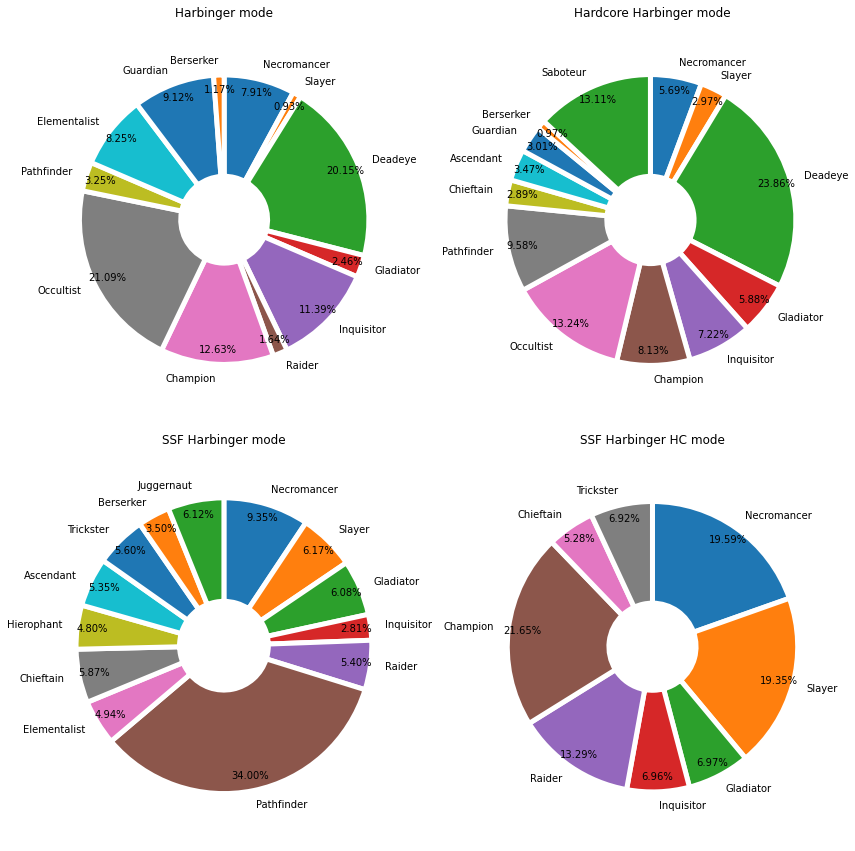

In [23]:
# visualization (graph 3-3)
# There's some null so I had to each ladder partialy

# percentage list making : each ladde
Har_top30 = top30cla[top30cla['Harbinger'].isna() == False][['class', 'Harbinger']]
HarHC_top30 = top30cla[top30cla['Hardcore Harbinger'].isna() == False][['class', 'Hardcore Harbinger']]
SSFHar_top30 = top30cla[top30cla['SSF Harbinger'].isna() == False][['class', 'SSF Harbinger']]
SSFHarHC_top30 = top30cla[top30cla['SSF Harbinger HC'].isna() == False][['class', 'SSF Harbinger HC']]

# use percentages and labels to plt code
# labels = top30cla.index
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
fig, ax = plt.subplots(2, 2, squeeze=True, figsize = (12, 12))
plt.subplot(2,2,1)
plt.pie(Har_top30['Harbinger'], labels=Har_top30['class'], autopct='%.2f%%', startangle=90, counterclock=False, wedgeprops=wedgeprops, pctdistance=0.9)
plt.subplot(2,2,2)
plt.pie(HarHC_top30['Hardcore Harbinger'], labels=HarHC_top30['class'], autopct='%.2f%%', startangle=90, counterclock=False, wedgeprops=wedgeprops, pctdistance=0.9)
plt.subplot(2,2,3)
plt.pie(SSFHar_top30['SSF Harbinger'], labels=SSFHar_top30['class'], autopct='%.2f%%', startangle=90, counterclock=False, wedgeprops=wedgeprops, pctdistance=0.9)
plt.subplot(2,2,4)
plt.pie(SSFHarHC_top30['SSF Harbinger HC'], labels=SSFHarHC_top30['class'], autopct='%.2f%%', startangle=90, counterclock=False, wedgeprops=wedgeprops, pctdistance=0.9)

# set the each pie chart title
ax[0, 0].set_title("{} mode".format(Har_top30.columns[1]))
ax[0, 0].axis('equal')
ax[0, 1].set_title("{} mode".format(HarHC_top30.columns[1]))
ax[0, 1].axis('equal')
ax[1, 0].set_title("{} mode".format(SSFHar_top30.columns[1]))
ax[1, 0].axis('equal')
ax[1, 1].set_title("{} mode".format(SSFHarHC_top30.columns[1]))
ax[1, 1].axis('equal')
fig.tight_layout()
plt.show()

#### getting the probability by method 2 

In [24]:
# top 30 Necromancers among the all Necromancers
top30necratio = top30cla.set_index('class').loc['Necromancer','Harbinger':'SSF Harbinger HC']

# Sum of "top 30 IDs of each classes among all of each classes"
top30allsum = top30cla[['Harbinger', 'Hardcore Harbinger', 'SSF Harbinger', 'SSF Harbinger HC']].sum()

print(top30necratio, '\n')
print(top30allsum)

Harbinger              0.4971
Hardcore Harbinger    0.28585
SSF Harbinger         0.34965
SSF Harbinger HC      0.53528
Name: Necromancer, dtype: object 

Harbinger             6.281632
Hardcore Harbinger    5.019686
SSF Harbinger         3.738563
SSF Harbinger HC      2.732632
dtype: object


In [25]:
# dividing
pd.set_option('display.float_format', None)
print(top30necratio/top30allsum)

Harbinger             0.079136
Hardcore Harbinger    0.056946
SSF Harbinger         0.093525
SSF Harbinger HC      0.195884
dtype: object


#### result2:
Even though this method has a problem, which must ignore the number of each class and their preference.  
But the results look pretty good. My words mean, that even if I expected a small probability, a ridiculously small value is a little bit hard to accept as a result...  

    Harbinger             0.079136
    Hardcore Harbinger    0.056946
    SSF Harbinger         0.093525
    SSF Harbinger HC      0.195884

### 3-1-3. Rate Among the all characters

This is rate of the top 30 Necromancer among 'all characters'.

In [26]:
# Necromancers who are in top 30 among all characters by ladder
df_Nec30.groupby('ladder')['id'].count() / df.groupby('ladder')['id'].count()

ladder
Harbinger             0.000402
Hardcore Harbinger    0.000403
SSF Harbinger         0.000401
SSF Harbinger HC      0.000735
Name: id, dtype: float64

#### result3:

    Harbinger             0.000402
    Hardcore Harbinger    0.000403
    SSF Harbinger         0.000401
    SSF Harbinger HC      0.000735

### 3-1-4. Bayesian Probability

ladder를 빼고 해보죠.

$ P(Top30|Nec) = \frac {P(Nec | Top30)\times P(Top30)} {P(Nec|Top30)\times P(Top30) + 
P(Nec|out\space of\space 30)\times P(out\space of\space 30) } $



P(Nec|Top30) = Necromancers ratio in top30 (3-1-1.)

P(Top30) = 30/15000
P(Out of 30) = 14970/15000



In [99]:
# P(Nec|Top30) = Necromancers ratio in top30 (3-1-1.)
prob_NT = df_Nec[df_Nec['rank']<=30]['id'].count() / 120

In [119]:
prob_T = 30/15000
prob_O = 1 - prob_T

In [121]:
prob_NO = df_Nec[df_Nec['rank']>30]['id'].count() / (14970*4)

In [122]:
prob_NT, prob_T, prob_O, prob_NO

(0.24166666666666667, 0.002, 0.998, 0.11770207080828324)

In [123]:
prob_TN = prob_NT * prob_T / (prob_NT*prob_T + prob_NO*prob_O)
prob_TN

0.004097781545852762

In [92]:
# the probability when we go in the top 30 by using broadcasting
total30prob = df[cond_30].groupby(by = 'ladder')['id'].count() / df.groupby(by = 'ladder')['id'].count()

# the ratio of Necromancers who are in the top 30.
Nec30ratio = df[(cond_30)&(cond_Nec)].groupby(by = 'ladder')['id'].count()/30

pd.set_option('display.float_format', None)
print(total30prob, '\n')
print(Nec30ratio)

ladder
Harbinger             0.002011
Hardcore Harbinger    0.002013
SSF Harbinger         0.002003
SSF Harbinger HC      0.002004
Name: id, dtype: float64 

ladder
Harbinger             0.200000
Hardcore Harbinger    0.200000
SSF Harbinger         0.200000
SSF Harbinger HC      0.366667
Name: id, dtype: float64


I thought, then, this can be used for setting values to predict with machine learning.

## 3-2. care of stream
---
### distribution of streaming

How much is streaming involved in the rank? We have to think about the relationship between columns. 

I think we should be noted that broadcasting itself does not affect the rank.  
Just because he's on the streaming doesn't mean he's doing better.  
In other words, some people just stream, and many people don't broadcast games and just play them.

But the questioner wanna know regarding 'streaming' meaning.   
Since it is not expected to be directly related to the rank, I will check it with the correlation coefficient.  

In [27]:
# get the correlation
df.corr()

,rank,dead,online,level,experience,challenges,stream
rank,1.000000,0.042754,-0.040522,-0.452510,-0.431177,-0.257123,-0.055688
dead,0.042754,1.000000,-0.085765,-0.333407,-0.311168,-0.210822,0.034619
online,-0.040522,-0.085765,1.000000,0.082778,0.105385,0.062610,-0.010505
level,-0.452510,-0.333407,0.082778,1.000000,0.924060,0.597135,0.098815
experience,-0.431177,-0.311168,0.105385,0.924060,1.000000,0.658386,0.113314
challenges,-0.257123,-0.210822,0.062610,0.597135,0.658386,1.000000,0.186115
stream,-0.055688,0.034619,-0.010505,0.098815,0.113314,0.186115,1.000000


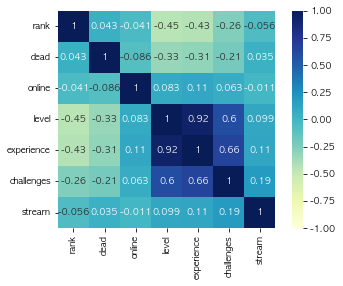

In [28]:
plt.rcParams["figure.figsize"] = (6, 4)
plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams["font.size"] = 9
plt.rc('axes', unicode_minus=False)  # prevent "UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.""
sns.heatmap(df.corr(), annot = True, cmap = "YlGnBu", square = True, vmin=-1, vmax=1)
plt.show()

It doesn't seem to have many relationships with stream.    

So I get the numbers for the Necromancers, just like the above methods.

### the Necromancers who is streaming

In [29]:
# set dataframes of Necromancers who's twitch column is not null.
df_NecTw = df_Nec[df_Nec['twitch'].isnull()==False]
df_NecTw30 = df_NecTw[df_NecTw['rank']<=30]

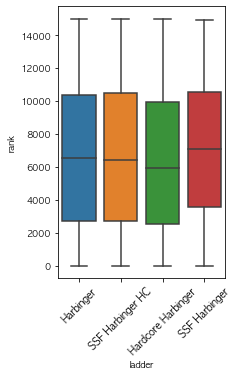

In [30]:
# Necromancers with stream rank boxplot by ladder
plt.figure(figsize=(3,5))
plt.xticks(rotation=45, fontsize=10)
sns.boxplot(data = df_NecTw, x = 'ladder', y = 'rank')
plt.show()

In [31]:
# All Necromancers by ladder - with stream
print(df_NecTw.groupby('ladder')['id'].count(), '\n')

# Necromancers Who are in top 30 by ladder - with stream
print(df_NecTw30.groupby('ladder')['id'].count())

ladder
Harbinger             374
Hardcore Harbinger    765
SSF Harbinger         307
SSF Harbinger HC      556
Name: id, dtype: int64 

ladder
Harbinger             6
Hardcore Harbinger    5
SSF Harbinger         2
SSF Harbinger HC      7
Name: id, dtype: int64


### 3-2-1. Among the top 30 * probability when we are in top 30

__”(number of Necromancers in the top 30 $\div$ number of All classes in the top 30) $\times$ (probability when we are in the top 30 among 15000 ranks)”__  

ratio the top 30 Necromancer(streaming) among 'the all Necromancers'

In [32]:
# classes ratio in top 30 who has twitch id
df_top30cl_tw = df[cond_30&cond_tw].pivot_table(columns = 'ladder', index = 'class',
                                aggfunc = 'count', fill_value = 0)['id'] / 30 * 100
# classes ratio in top 30 who hasn't twitch id
df_top30cl_ntw = df[cond_30&(~cond_tw)].pivot_table(columns = 'ladder', index = 'class',
                                aggfunc = 'count', fill_value = 0)['id'] / 30 * 100

#### [graph 3-4] visualizing each classes in top30 by twitch column

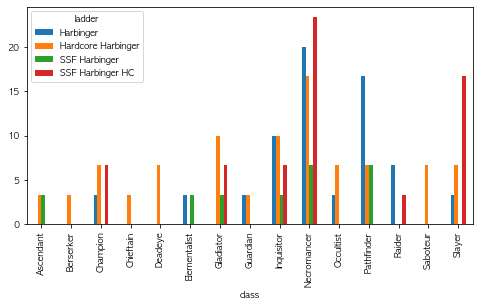

In [33]:
plt.rcParams["figure.figsize"] = (8, 4)
df_top30cl_tw.reset_index().plot(kind = 'bar', x = 'class')
plt.show()

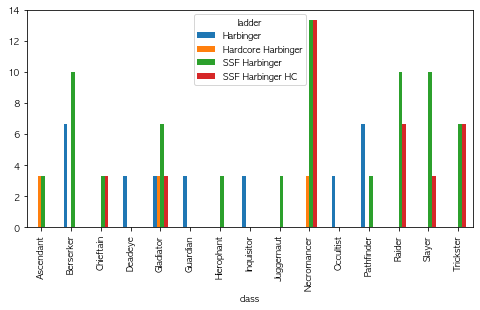

In [34]:
plt.rcParams["figure.figsize"] = (8, 4)
df_top30cl_ntw.reset_index().plot(kind = 'bar', x = 'class')
plt.show()

#### getting the probability by method 1 
We divided them the twitch users or not.  
Get the probablity by multiplying the probability to be in the top 30 and the ratio of Necromancers who are in the top 30.  
As you know, each ladder doesn't have an exact number of 15000 IDs.  

In [35]:
# in top 30 classes ratio by using broadcasting
total30prob = df[cond_30].groupby(by = 'ladder')['id'].count() / df.groupby(by = 'ladder')['id'].count()
print(total30prob, '\n')
# each ratio of twitch users or not1
twratio = df[(cond_30)&(cond_Nec)&(cond_tw)].groupby(by = 'ladder')['id'].count()/30
print(twratio, '\n')
# each ratio of twitch users or not2
ntwratio = df[(cond_30)&(cond_Nec)&(~cond_tw)].groupby(by = 'ladder')['id'].count()/30
print(ntwratio)

ladder
Harbinger             0.002011
Hardcore Harbinger    0.002013
SSF Harbinger         0.002003
SSF Harbinger HC      0.002004
Name: id, dtype: float64 

ladder
Harbinger             0.200000
Hardcore Harbinger    0.166667
SSF Harbinger         0.066667
SSF Harbinger HC      0.233333
Name: id, dtype: float64 

ladder
Hardcore Harbinger    0.033333
SSF Harbinger         0.133333
SSF Harbinger HC      0.133333
Name: id, dtype: float64


In [36]:
# multiplying
pd.set_option('display.float_format', None)
print("Necromancers, twitch users in top30 ratio X top 30 probability")
print(total30prob*twratio)
print("Necromancers, not twitch users in top30 ratio X top 30 probability")
print(total30prob*ntwratio)

Necromancers, twitch users in top30 ratio X top 30 probability
ladder
Harbinger             0.000402
Hardcore Harbinger    0.000335
SSF Harbinger         0.000134
SSF Harbinger HC      0.000468
Name: id, dtype: float64
Necromancers, not twitch users in top30 ratio X top 30 probability
ladder
Harbinger                  NaN
Hardcore Harbinger    0.000067
SSF Harbinger         0.000267
SSF Harbinger HC      0.000267
Name: id, dtype: float64


#### result1: 
As you see, there are no Necromancers who stream twitch in Harbinger mode.  
And the probability is almost higher when we stream to twitch, but in SSF Harbinger mode isn't.  

##### values get from twitch users
    ladder
    Harbinger             0.000402
    Hardcore Harbinger    0.000335
    SSF Harbinger         0.000134
    SSF Harbinger HC      0.000468
##### values get from not twitch users
    ladder
    Harbinger                  NaN
    Hardcore Harbinger    0.000067
    SSF Harbinger         0.000267
    SSF Harbinger HC      0.000267

### 3-2-2. Rate of twitch users in top 30 Among the Necromancers 
`method2` is quite difficult for me in this case.  
Users who are in the top 30 and stream twitch do not exist in some classes.  

But if we get the same method, just switch `cond_tw` and `~cond_tw`, and we can compare the rate by whether twitch is streaming or not, in the top 30.  

#### 3-2-2-1. percentage of each class's top 30 streaming characters among each class
"streaming users who are in the top 30 among each class"

In [37]:
# classes who are twitch users and are in top 30, among each classes by ladder
# we exceptd the classes what is not in top30

classes = list(df['class'].unique())

for i in classes:
    df_bin = df[df['class'] == i]
    df_bin30 = df_bin[(df_bin['rank']<=30)&(df_bin['stream']==1)]
    ser = df_bin30.groupby('ladder')['id'].count() / df_bin.groupby('ladder')['id'].count() * 100
    sum_ser = ser.sum()
#     print("# {} : top 30 twitch users ratio(%) in each class by ladder".format(i))
#     print(ser)
#     print("{}'s top 30 twitch users ratio(%): {}".format(i, sum_ser))
#     print("==========================================")
    if i == classes[0]:
        ser1 = ser
    elif i == classes[1]:
        ser2 = ser
        concatingdf_2 = pd.concat([ser1, ser2], axis=1, ignore_index=True)
    else:
        ser2 = ser
        concatingdf_2 = pd.concat([concatingdf_2, ser2], axis=1, ignore_index=True)


# reset index and rename with a dictionary what we made
concatingdf_2.reset_index(drop = False, inplace = True)

dictionary = dict()
for i in range(0, 26):
    dictionary[i] = classes[i]

concatingdf_2.rename(columns = dictionary, inplace = True)
concatingdf_2


# and transpose the dataframe to look good.
top30twcla = concatingdf_2.transpose()
top30twcla.reset_index(drop = False, inplace = True)
top30twcla.rename(columns = top30twcla.iloc[0], inplace = True)
top30twcla = top30twcla.drop(top30twcla.index[0])
top30twcla.reset_index(drop = True, inplace = True)
top30twcla.rename(columns = {'ladder':'class'}, inplace = True)
top30twcla

,class,Harbinger,Hardcore Harbinger,SSF Harbinger,SSF Harbinger HC
0,Necromancer,0.4971,0.238209,0.11655,0.340633
1,Slayer,0.058617,0.14892,NaN,0.440529
2,Deadeye,NaN,1.197605,NaN,NaN
3,Gladiator,NaN,0.221239,0.075758,0.126904
4,Inquisitor,0.536673,0.362319,0.105042,0.190114
5,Raider,0.102934,NaN,NaN,0.121065
6,Champion,0.793651,0.408163,NaN,0.591716
7,Occultist,0.662252,0.664452,NaN,NaN
8,Pathfinder,0.145858,0.480769,0.847458,NaN
9,Elementalist,0.518135,NaN,0.184843,NaN


#### 3-2-2-2. percentage of each class's top 30 not streaming characters among each class
"not streaming users who are in the top 30 among each class"

In [38]:
# classes who are not twitch users and are in top 30, among each classes by ladder
# we exceptd the classes what is not in top30

classes = list(df['class'].unique())

for i in classes:
    df_bin = df[df['class'] == i]
    df_bin30 = df_bin[(df_bin['rank']<=30)&(df_bin['stream']==0)]
    ser = df_bin30.groupby('ladder')['id'].count() / df_bin.groupby('ladder')['id'].count() * 100
    sum_ser = ser.sum()
#     print("# {} : top 30 twitch users ratio(%) in each class by ladder".format(i))
#     print(ser)
#     print("{}'s top 30 twitch users ratio(%): {}".format(i, sum_ser))
#     print("==========================================")
    if i == classes[0]:
        ser1 = ser
    elif i == classes[1]:
        ser2 = ser
        concatingdf_3 = pd.concat([ser1, ser2], axis=1, ignore_index=True)
    else:
        ser2 = ser
        concatingdf_3 = pd.concat([concatingdf_3, ser2], axis=1, ignore_index=True)


# reset index and rename with a dictionary what we made
concatingdf_3.reset_index(drop = False, inplace = True)

dictionary = dict()
for i in range(0, 26):
    dictionary[i] = classes[i]

concatingdf_3.rename(columns = dictionary, inplace = True)
concatingdf_3


# and transpose the dataframe to look good.
top30ntwcla = concatingdf_3.transpose()
top30ntwcla.reset_index(drop = False, inplace = True)
top30ntwcla.rename(columns = top30ntwcla.iloc[0], inplace = True)
top30ntwcla = top30ntwcla.drop(top30ntwcla.index[0])
top30ntwcla.reset_index(drop = True, inplace = True)
top30ntwcla.rename(columns = {'ladder':'class'}, inplace = True)
top30ntwcla

,class,Harbinger,Hardcore Harbinger,SSF Harbinger,SSF Harbinger HC
0,Necromancer,NaN,0.047642,0.2331,0.194647
1,Slayer,NaN,NaN,0.230592,0.088106
2,Deadeye,1.265823,NaN,NaN,NaN
3,Gladiator,0.154321,0.073746,0.151515,0.063452
4,Inquisitor,0.178891,NaN,NaN,NaN
5,Raider,NaN,NaN,0.201884,0.242131
6,Champion,NaN,NaN,NaN,NaN
7,Occultist,0.662252,NaN,NaN,NaN
8,Pathfinder,0.058343,NaN,0.423729,NaN
9,Elementalist,NaN,NaN,NaN,NaN


#### getting the probability by method 2

In [39]:
# top 30 streaming Necromancers among the all Necromancers
top30twnec_ratio = top30twcla.set_index('class').loc['Necromancer','Harbinger':'SSF Harbinger HC']

# Sum of "top 30 streaming IDs of each classes among all of each classes"
top30twall_sum = top30twcla[['Harbinger', 'Hardcore Harbinger', 'SSF Harbinger', 'SSF Harbinger HC']].sum()

print(top30twnec_ratio, '\n')
print(top30twall_sum)

Harbinger               0.4971
Hardcore Harbinger    0.238209
SSF Harbinger          0.11655
SSF Harbinger HC      0.340633
Name: Necromancer, dtype: object 

Harbinger             3.601751
Hardcore Harbinger    4.811266
SSF Harbinger          1.42965
SSF Harbinger HC       1.81096
dtype: object


In [40]:
# top 30 streaming Necromancers among the all Necromancers
top30ntwnec_ratio = top30ntwcla.set_index('class').loc['Necromancer','Harbinger':'SSF Harbinger HC']

# Sum of "top 30 not streaming IDs of each classes among all of each classes"
top30ntwall_sum = top30ntwcla[['Harbinger', 'Hardcore Harbinger', 'SSF Harbinger', 'SSF Harbinger HC']].sum()

print(top30ntwnec_ratio, '\n')
print(top30ntwall_sum)

Harbinger                  NaN
Hardcore Harbinger    0.047642
SSF Harbinger           0.2331
SSF Harbinger HC      0.194647
Name: Necromancer, dtype: object 

Harbinger             2.679881
Hardcore Harbinger     0.20842
SSF Harbinger         2.308913
SSF Harbinger HC      0.921672
dtype: object


In [41]:
# dividing
pd.set_option('display.float_format', None)
print(top30twnec_ratio/top30twall_sum, '\n')
print(top30ntwnec_ratio/top30ntwall_sum)

Harbinger             0.138016
Hardcore Harbinger    0.049511
SSF Harbinger         0.081524
SSF Harbinger HC      0.188095
dtype: object 

Harbinger                  NaN
Hardcore Harbinger    0.228585
SSF Harbinger         0.100957
SSF Harbinger HC      0.211189
dtype: object


#### result2:
This method has problems also because I divided it with different values. Each value is composed of streaming-top 30 users or not streaming-top 30 users.  

##### When you are streaming user, and choose Necromancer
    Harbinger             0.138016
    Hardcore Harbinger    0.049511
    SSF Harbinger         0.081524
    SSF Harbinger HC      0.188095

##### When you are not streaming user, and choose Necromancer
    Harbinger                  NaN
    Hardcore Harbinger    0.228585
    SSF Harbinger         0.100957
    SSF Harbinger HC      0.211189

And in the top30 at ladder 'Harbinger' mode, there are no Necromancers who stream twitch.  
So we couldn't get the case when we don't have a plan to stream twitch. It's quite radical, isn't it?  

### 3-2-3. Rate of streaming/not streaming Necromancers among the all users

In [42]:
# streaming
print(df[(cond_Nec)&(cond_tw)&(cond_30)].groupby('ladder')['id'].count() / df.groupby('ladder')['id'].count(), '\n')

# not streaming
print(df[(cond_Nec)&(~cond_tw)&(cond_30)].groupby('ladder')['id'].count() / df.groupby('ladder')['id'].count())

ladder
Harbinger             0.000402
Hardcore Harbinger    0.000335
SSF Harbinger         0.000134
SSF Harbinger HC      0.000468
Name: id, dtype: float64 

ladder
Harbinger                  NaN
Hardcore Harbinger    0.000067
SSF Harbinger         0.000267
SSF Harbinger HC      0.000267
Name: id, dtype: float64


#### result3:
It seems Necromancers who stream twitch do better play in each mode, and (as expected) in Harbinger's top 30, there are no Necromancers who don't stream twitch.  
But don't forget! Just twitch streaming can't make us play better.🤓  
##### streaming Necromancers in the top 30 among all users
    Harbinger             0.000402
    Hardcore Harbinger    0.000335
    SSF Harbinger         0.000134
    SSF Harbinger HC      0.000468
##### not-streaming Necromancers in the top 30 among all users
    Harbinger                  NaN
    Hardcore Harbinger    0.000067
    SSF Harbinger         0.000267
    SSF Harbinger HC      0.000267

### extra1. What percent(%) of users are in the total top 30 among streaming Necromancers?

In [43]:
# Streaming Necromancers who are in top 30 among all streaming Necromancers by ladder
df_NecTw30.groupby('ladder')['id'].count() / df_NecTw.groupby('ladder')['id'].count() * 100

ladder
Harbinger             1.604278
Hardcore Harbinger    0.653595
SSF Harbinger         0.651466
SSF Harbinger HC      1.258993
Name: id, dtype: float64

### extra2. What percent(%) of twitch users are in the total top 30 among all Necromancers?

In [44]:
# Streaming Necromancers Who are in top 30 among all Necromancers by ladder
df_NecTw30.groupby('ladder')['id'].count() / df_Nec.groupby('ladder')['id'].count() * 100

ladder
Harbinger             0.497100
Hardcore Harbinger    0.238209
SSF Harbinger         0.116550
SSF Harbinger HC      0.340633
Name: id, dtype: float64

### extra3. What percent(%) of Necromancers are in the total top 30 among all twitch streamers? 

In [45]:
# Streaming Necromancers who are in top 30 among all streaming characters by ladder
df_NecTw30.groupby('ladder')['id'].count() / df[(~cond_tw)].groupby('ladder')['id'].count() * 100

ladder
Harbinger             0.057394
Hardcore Harbinger    0.052893
SSF Harbinger         0.016234
SSF Harbinger HC      0.062228
Name: id, dtype: float64

# 4. The average number of "finished" challenges 
---
##### Q4. The average number of finished challenges for each division shows the division with the highest and lowest average challenges.

This question is really clear, thankfully.  
I'll separate the division and calculate the average challenges.  


In [46]:
# simple max and min
df.groupby(by = 'ladder')[['challenges']].agg(['max', 'min'])

challenges    
                          max min
ladder                           
Harbinger                  40  13
Hardcore Harbinger         40   8
SSF Harbinger              40   9
SSF Harbinger HC           40   4

In [47]:
# average challenges by each ladder
df.groupby(by = 'ladder')[['challenges']].mean()

,challenges
ladder,
Harbinger,33.472181
Hardcore Harbinger,27.168668
SSF Harbinger,22.146719
SSF Harbinger HC,20.287002


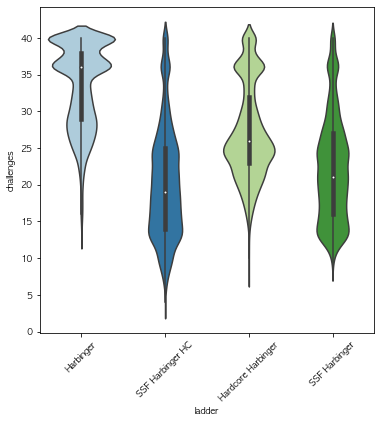

In [48]:
# visualizing the average
plt.rcParams["figure.figsize"] = (6, 6)
plt.xticks(rotation = 45)
sns.violinplot(data = df, x = 'ladder', y = 'challenges', palette = 'Paired')
plt.show()

# 5. Is the class of the dead characters related to level?
---
##### Q5. Show dependency between level and class of dead characters. Only for HC divisions.

The dead column has a meaning in only hardcore modes.  
That means maybe this: the goal of the hardcore mode is survival with the best playing, and maybe alive characters can restart or continue the game.  

I understood this question as the relation between the dead characters' class and the level.   
Because we can think that the death is related just level(user's ability) or maybe the class is the problem.  
If there is a dependency between level and class in dead characters, we can treat that some particular class is **preferred** because of the difficulty or something like that, regardless of the class's performance(because it's already ended games).

The methods which can get the dependency,  
    1. get correlation between level and class.  
    2. compare the average level by each class (+ t-test)

And I imagine also this : make a machine learning model with class and level, and watch whether the model can predict the class just with level! I'm little bit sorry for the computer but the computer can't do that.


### ratio of dead characters

In [49]:
# dataframe contains only hardcore modes
df_hc = df.loc[df['ladder'].isin(['SSF Harbinger HC', 'Hardcore Harbinger'])]

# dead characters rate
df_hc.pivot_table(index = 'ladder', values = 'dead')

,dead
ladder,
Hardcore Harbinger,0.633680
SSF Harbinger HC,0.743788


### level distribution

In [50]:
df_hc['level'].describe()

count    29877.000000
mean        81.473575
std         12.781287
min         53.000000
25%         71.000000
50%         89.000000
75%         91.000000
max        100.000000
Name: level, dtype: float64

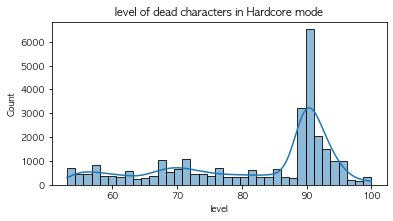

In [51]:
plt.figure(figsize = (6, 3))
sns.histplot(x = df_hc['level'], palette = 'Paired', kde = True)
plt.title("level of dead characters in Hardcore mode")
plt.show()

Many people already know that **the minimum level of users in Hardcore mode is 53** before reaching this question.  
This is quite important because the scale is regarded as big. After all, because it starts at 53.  
So I applied **Min-Max scaler** in this case because the minimum and maximum are settled.  

### preprocessing the data

In [52]:
# dead
df_dead = df_hc.loc[df['dead'] == True][['class', 'level']]
df_dead

,class,level
15,Raider,100
24,Necromancer,100
32,Slayer,100
48,Occultist,100
77,Necromancer,99
...,...,...
59762,Juggernaut,53
59763,Slayer,89
59765,Berserker,53
59768,Necromancer,53


In [53]:
# Min-Max Scaling
Xmin = min(df_dead['level'])
Xmax = max(df_dead['level'])
scaled = (df_dead['level'] - Xmin) / (Xmax - Xmin)
df_dead['scaled_level'] = scaled
df_dead.head(5)

,class,level,scaled_level
15,Raider,100,1.000000
24,Necromancer,100,1.000000
32,Slayer,100,1.000000
48,Occultist,100,1.000000
77,Necromancer,99,0.978723


#### get dummies

In [54]:
df_deads_onehot = pd.get_dummies(df_dead, drop_first = False)
df_deads_onehot.head(5)

,level,scaled_level,class_Ascendant,class_Assassin,class_Berserker,class_Champion,class_Chieftain,class_Deadeye,class_Duelist,class_Elementalist,...,class_Pathfinder,class_Raider,class_Ranger,class_Saboteur,class_Scion,class_Shadow,class_Slayer,class_Templar,class_Trickster,class_Witch
15,100,1.000000,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
24,100,1.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32,100,1.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
48,100,1.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77,99,0.978723,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 5-1. correlation

In [55]:
df_deads_onehot.corr().round(3)

,level,scaled_level,class_Ascendant,class_Assassin,class_Berserker,class_Champion,class_Chieftain,class_Deadeye,class_Duelist,class_Elementalist,...,class_Pathfinder,class_Raider,class_Ranger,class_Saboteur,class_Scion,class_Shadow,class_Slayer,class_Templar,class_Trickster,class_Witch
level,1.000,1.000,0.027,-0.063,0.049,0.037,0.018,-0.024,-0.080,-0.085,...,0.040,-0.013,-0.054,-0.013,-0.060,-0.060,0.045,-0.083,-0.017,-0.096
scaled_level,1.000,1.000,0.027,-0.063,0.049,0.037,0.018,-0.024,-0.080,-0.085,...,0.040,-0.013,-0.054,-0.013,-0.060,-0.060,0.045,-0.083,-0.017,-0.096
class_Ascendant,0.027,0.027,1.000,-0.028,-0.102,-0.043,-0.058,-0.031,-0.013,-0.040,...,-0.036,-0.067,-0.009,-0.042,-0.011,-0.010,-0.084,-0.013,-0.069,-0.017
class_Assassin,-0.063,-0.063,-0.028,1.000,-0.040,-0.017,-0.023,-0.012,-0.005,-0.016,...,-0.014,-0.026,-0.003,-0.016,-0.004,-0.004,-0.033,-0.005,-0.027,-0.006
class_Berserker,0.049,0.049,-0.102,-0.040,1.000,-0.061,-0.082,-0.044,-0.019,-0.057,...,-0.052,-0.096,-0.012,-0.059,-0.015,-0.014,-0.119,-0.019,-0.098,-0.024
class_Champion,0.037,0.037,-0.043,-0.017,-0.061,1.000,-0.034,-0.018,-0.008,-0.024,...,-0.022,-0.040,-0.005,-0.025,-0.006,-0.006,-0.050,-0.008,-0.041,-0.010
class_Chieftain,0.018,0.018,-0.058,-0.023,-0.082,-0.034,1.000,-0.025,-0.011,-0.032,...,-0.029,-0.054,-0.007,-0.033,-0.009,-0.008,-0.067,-0.011,-0.056,-0.013
class_Deadeye,-0.024,-0.024,-0.031,-0.012,-0.044,-0.018,-0.025,1.000,-0.006,-0.017,...,-0.016,-0.029,-0.004,-0.018,-0.005,-0.004,-0.036,-0.006,-0.030,-0.007
class_Duelist,-0.080,-0.080,-0.013,-0.005,-0.019,-0.008,-0.011,-0.006,1.000,-0.007,...,-0.007,-0.012,-0.002,-0.008,-0.002,-0.002,-0.015,-0.002,-0.013,-0.003
class_Elementalist,-0.085,-0.085,-0.040,-0.016,-0.057,-0.024,-0.032,-0.017,-0.007,1.000,...,-0.020,-0.037,-0.005,-0.023,-0.006,-0.005,-0.046,-0.007,-0.038,-0.009


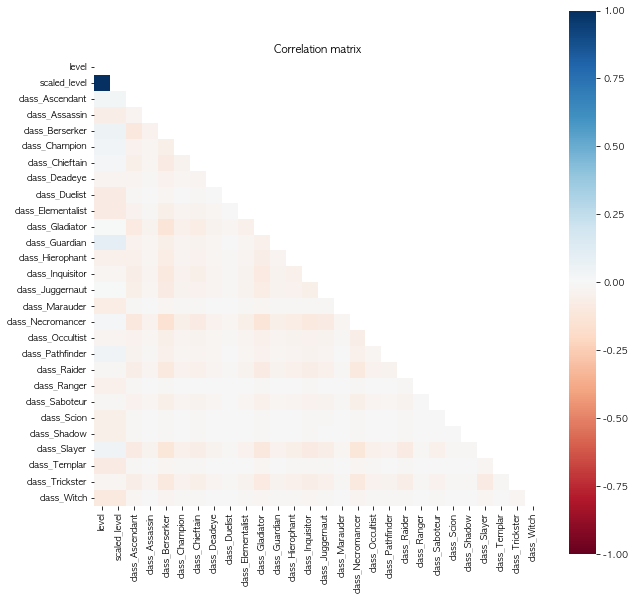

In [56]:
mask = np.zeros_like(df_deads_onehot.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (10, 10))
sns.heatmap(data = df_deads_onehot.corr(), cmap = 'RdBu', mask=mask, square = True, vmin = -1, vmax = 1)
plt.title('Correlation matrix')
plt.show()

#### result1:
That seems there's no correlation between the level and the class, but the data indeed became scarce data after getting dummies.  
In this case, we can use polyserial correlation analysis.

`stats.pointbiserialr` need bools array... 'biserial'... this is nominal...

## 5-2. Average level of each class 

### 5-2-1. Average level

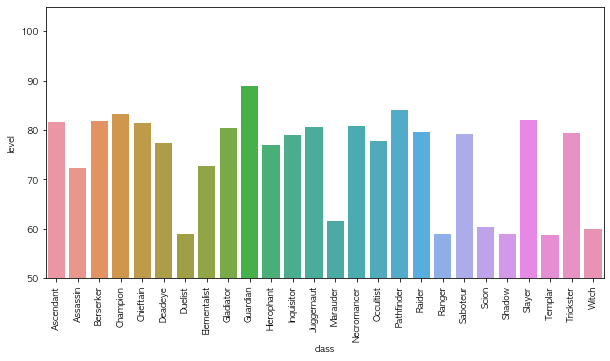

In [57]:
plt.rcParams['figure.figsize'] = (10,5)
plt.xticks(rotation = 90)
plt.ylim(50, 105)
df_hc_lev_mean = df_dead.groupby('class')[['level']].mean()
sns.barplot(data = df_hc_lev_mean, x = df_hc_lev_mean.index, y = 'level') # 신뢰구간 표시 못하나 그냥 boxplot그려야 하나
plt.show()

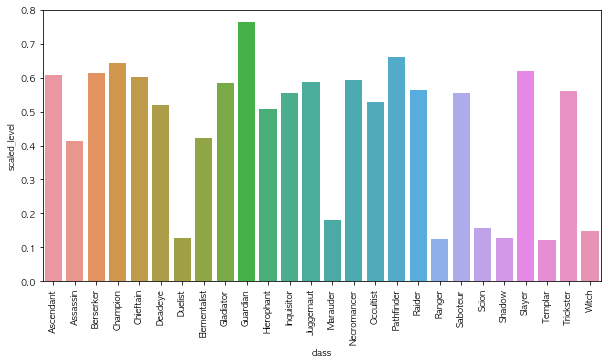

In [58]:
plt.rcParams['figure.figsize'] = (10,5)
plt.xticks(rotation = 90)
df_hc_lev_mean = df_dead.groupby('class')[['scaled_level']].mean()
sns.barplot(data = df_hc_lev_mean, x = df_hc_lev_mean.index, y = 'scaled_level')
plt.show()

아니 스케일링을 하는 이유가 없어지는데... 그냥 해야겠다. 다 지우고,,,, 그냥 기록만 남기고...

그래프를 보고 알 수 있는 것: 듀엘리스트, 머러더, 레인저, 사이온, 셰도우, 템플러, 위치는 평균 레벨이 현저히 낮다.  
아마 이 모든 클래스를 데리고 ANOVA를 하면 분명 다르다고 할 것이고, 전부 사후검정을 하게되면 이 클래스들에서 차이가 나타날 것이다.  
일부 클래스에서 낮은 것은 사실이나 이것이 꼭 레벨과 관련이 있다고 할 수 있는 것은 아니다.  
왜냐하면 이미 언급했듯, 이 모드의 최소 레벨은 53으로, 경험이 풍부한 사람이 부 캐릭터를 53까지 키워서 하드코어 모드에서 기록을 세웠을 가능성이 다분하며, 그 직업들이 하드코어모드에서 충분히 인기있는 클래스들이었다면 더욱더 이 시나리오가 맞을 가능성이 높다.   

그리고 해야할 것 
- 클래스별 평균 구하기
- 평균이 다른지 ANOVA 하기